In [1]:
import nbimporter
from RADARDataCapture import FMCWRADARDataCapture
from MOCAPDataCapture import MOCAPDataCapture
from FPDataCapture import FPDataCapture
import h5py
import numpy as np
import pandas as pd
import imageio
import matplotlib.pyplot as plt
from datetime import datetime

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Processing RD Frame: 1
Processing RD Frame: 2
Processing RD Frame: 3
Processing RD Frame: 4
Processing RD Frame: 5
Processing RD Frame: 6
Processing RD Frame: 7
Processing RD Frame: 8
Processing RD Frame: 9
Processing RD Frame: 10
Processing RD Frame: 11
Processing RD Frame: 12
Processing RD Frame: 13
Processing RD Frame: 14
Processing RD Frame: 15
Processing RD Frame: 16
Processing RD Frame: 17
Processing RD Frame: 18
Processing RD Frame: 19
Processing RD Frame: 20
Processing RD Frame: 21
Processing RD Frame: 22
Processing RD Frame: 23
Processing RD Frame: 24
Processing RD Frame: 25
Processing RD Frame: 26
Processing RD Frame: 27
Processing RD Frame: 28
Processing RD Frame: 29
Processing RD Frame: 30
Processing RD Frame: 31
Processing RD Frame: 32
Processing RD Frame: 33
Processing RD Frame: 34
Processing RD Frame: 35
Processing RD Frame: 36
Processing RD Frame: 37
Processing RD Frame: 38
Processing RD Frame: 39
Processing RD Frame: 40
Processing RD Frame: 41
Processing RD Frame: 42
P

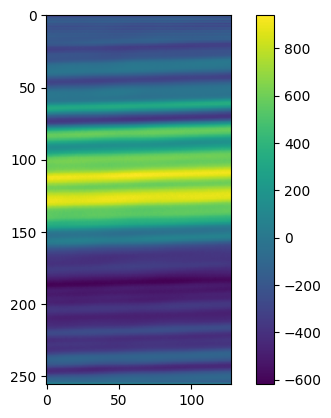

(4, 1000, 256, 128)
(4, 1000, 128, 128)


In [2]:
# Define the path to the test data
test_path = "/Users/danielcopeland/Library/CloudStorage/OneDrive-MassachusettsInstituteofTechnology/Yoga_Study_RADAR_Data/02/02_CRW2L_RR_V1.h5"

# Initialize the FMCWRADARDataCapture object
test_data = FMCWRADARDataCapture(file_path=test_path)

# Load and save the data
dataCubes = test_data.load_and_save()

print(dataCubes.shape)

# Process the data with Range-Doppler processing
processed_data = test_data.range_doppler_processing(dataCubes)

print(processed_data.shape)

In [3]:
filter_pattern = test_data.generate_actuator_filter(dataCubes)
print(filter_pattern.shape)

(55, 128, 128)


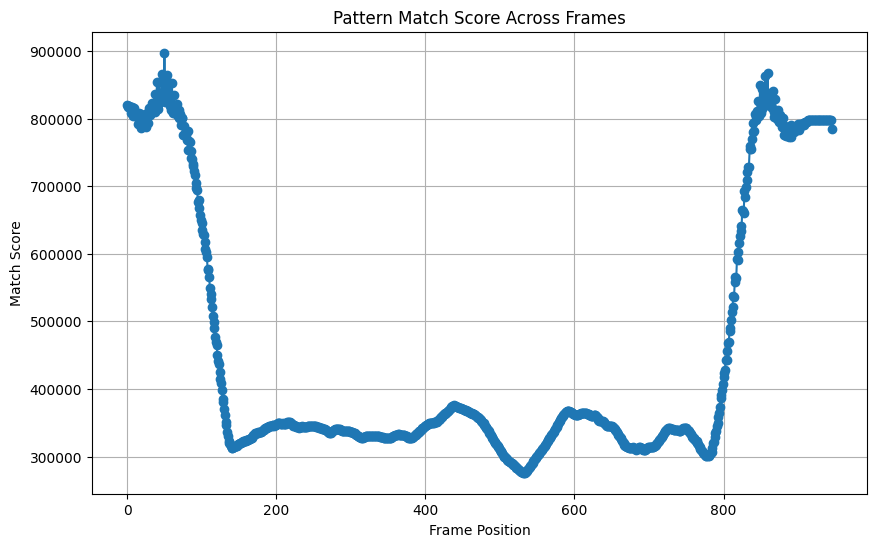

In [4]:
peaks, match_scores_summed = test_data.slide_pattern_over_data(filter_pattern, processed_data)
test_data.plot_match_scores(match_scores_summed)



In [5]:
print(peaks)

[50, 859]


In [5]:

# Example usage
start_frame_1 = 14
end_frame_1 = 27  # Pattern length is 14 frames, so the end_frame is start_frame + 13
start_frame_2 = 966
end_frame_2 = 979

# Adjust the end_frame to be start_frame + pattern length - 1
end_frame_1 = start_frame_1 + filter_pattern.shape[0] - 1
end_frame_2 = start_frame_2 + filter_pattern.shape[0] - 1

score_1 = test_data.manual_correlation(filter_pattern, processed_data[0], start_frame_1, end_frame_1)
score_2 = test_data.manual_correlation(filter_pattern, processed_data[0], start_frame_2, end_frame_2)

print(f"Correlation score for first event: {score_1}")
print(f"Correlation score for second event: {score_2}")


Correlation score for first event: 212991.9999999999
Correlation score for second event: 193849.46389539557


In [5]:
gif_filename = test_path.split("/")[-1].split(".")[0] + "__" + str(datetime.now()) + '.gif'
print(gif_filename)
gif_path = test_data.create_gif(processed_data[0], gif_filename)
print(f"GIF saved to {gif_path}")

02_CRW2L_RR_V1__2024-02-01 18:49:52.320776.gif
GIF saved to /Users/danielcopeland/Library/Mobile Documents/com~apple~CloudDocs/MIT Masters/DRL/LABx/RADARTreePose/data/gifs/02_CRW2L_RR_V1__2024-02-01 18:49:52.320776.gif


In [4]:
gif_filename = "filter_pattern_v1.gif"
print(gif_filename)
gif_path = test_data.create_gif(filter_pattern, gif_filename)
print(f"GIF saved to {gif_path}")

filter_pattern_v1.gif
GIF saved to /Users/danielcopeland/Library/Mobile Documents/com~apple~CloudDocs/MIT Masters/DRL/LABx/RADARTreePose/data/gifs/filter_pattern_v1.gif


In [ ]:
# Usage example:
base_file_path = '/Users/danielcopeland/Library/CloudStorage/OneDrive-MassachusettsInstituteofTechnology/Yoga_Study_MOCAP_FP_Data/04/04_MNTRL_MC_V1.tsv'
fp_data_capture = FPDataCapture('/Users/danielcopeland/Library/CloudStorage/OneDrive-MassachusettsInstituteofTechnology/Yoga_Study_MOCAP_FP_Data/04/04_MNTRL_MC_V1.tsv')
lift_times, down_times = fp_data_capture.identify_foot_lift()
# Now you can access the times directly
print(f"Foot Lift Times: {lift_times}")
print(f"Foot Down Times: {down_times}")



Data saved to /Users/danielcopeland/Library/Mobile Documents/com~apple~CloudDocs/MIT Masters/DRL/LABx/RADARTreePose/data/csvs/04_MNTRL_MC_V1_f_1.csv
Data saved to /Users/danielcopeland/Library/Mobile Documents/com~apple~CloudDocs/MIT Masters/DRL/LABx/RADARTreePose/data/csvs/04_MNTRL_MC_V1_f_2.csv
Foot Lift Times: [9.97583, 17.925, 25.9625]
Foot Down Times: [14.94917, 22.88417]


FMCW RADAR Data Class Testing

RADAR Range-Doppler Processing

In [6]:
# Process the data with Range-Doppler processing
processed_data = test_data.range_doppler_processing(dataCubes)

In [7]:
print(processed_data.shape)

(4, 1000, 64, 256)


RADAR Range-Doppler GIF Generation

In [8]:
gif_filename = test_path.split("/")[-1].split(".")[0] + "__" + str(datetime.now()) + '.gif'
print(gif_filename)
gif_path = test_data.create_gif(processed_data[0], gif_filename)
print(f"GIF saved to {gif_path}")

02_CRW2L_RR_V1__2024-02-01 17:54:29.931125.gif
GIF saved to /Users/danielcopeland/Library/Mobile Documents/com~apple~CloudDocs/MIT Masters/DRL/LABx/RADARTreePose/data/gifs/02_CRW2L_RR_V1__2024-02-01 17:54:29.931125.gif


RADAR AOA Processing

In [5]:
# Assume `aoa_data` is the output from your AoA processing function and is a 3D numpy array.
aoa_data = test_data.angle_of_arrival_processing(dataCubes)

RADAR AOA GIF Generation

In [6]:
# Specify the filename for the GIF. This should include the full path or be relative to the current directory.
gif_filename = "aoa_heatmap.gif"

# Call the create_gif function to generate the GIF from the AoA data.
test_data.create_gif(aoa_data, gif_filename)

# Now you have a GIF animation of your AoA heatmaps.


'/Users/danielcopeland/Library/Mobile Documents/com~apple~CloudDocs/MIT Masters/DRL/LABx/RADARTreePose/data/gifs/aoa_heatmap.gif'

MOCAP Data Loading Test

In [2]:
# Example usage:
mocap = MOCAPDataCapture('/Users/danielcopeland/Library/CloudStorage/OneDrive-MassachusettsInstituteofTechnology/Yoga_Study_MOCAP_Data/02/tsv/02_CRW2L_MC_V1.tsv')
mocap.find_actuator_start_end_direction_changes()
print(mocap.start_actuator_time, mocap.end_actuator_time)

Participant ID 02
Saved: 02_CRW2L_MC_V1_pos.tsv
Saved: 02_CRW2L_MC_V1_vel.tsv
Position and velocity data loaded and processed.
2     frame   time participant_id  Actuator_pos_X  Actuator_pos_Y  \
0         0   0.00             02     5057.750000      405.817993   
1         1   0.01             02     5057.748047      405.824005   
2         2   0.02             02     5057.748047      405.824005   
3         3   0.03             02     5057.728027      405.834015   
4         4   0.04             02     5057.725098      405.839996   
...     ...    ...            ...             ...             ...   
3995   3995  39.95             02     5052.921875      393.751007   
3996   3996  39.96             02     5052.926758      393.752991   
3997   3997  39.97             02     5052.925781      393.746002   
3998   3998  39.98             02     5052.926758      393.752991   
3999   3999  39.99             02     5052.935059      393.734009   

2     Actuator_pos_Z  Wrist_R_pos_X  Wrist_R

Participant ID 02
Saved: 02_CRW2L_MC_V1_pos.tsv
Saved: 02_CRW2L_MC_V1_vel.tsv
Position and velocity data loaded and processed.
2     frame   time participant_id  Actuator_pos_X  Actuator_pos_Y  \
0         0   0.00             02     5057.750000      405.817993   
1         1   0.01             02     5057.748047      405.824005   
2         2   0.02             02     5057.748047      405.824005   
3         3   0.03             02     5057.728027      405.834015   
4         4   0.04             02     5057.725098      405.839996   
...     ...    ...            ...             ...             ...   
3995   3995  39.95             02     5052.921875      393.751007   
3996   3996  39.96             02     5052.926758      393.752991   
3997   3997  39.97             02     5052.925781      393.746002   
3998   3998  39.98             02     5052.926758      393.752991   
3999   3999  39.99             02     5052.935059      393.734009   

2     Actuator_pos_Z  Wrist_R_pos_X  Wrist_R

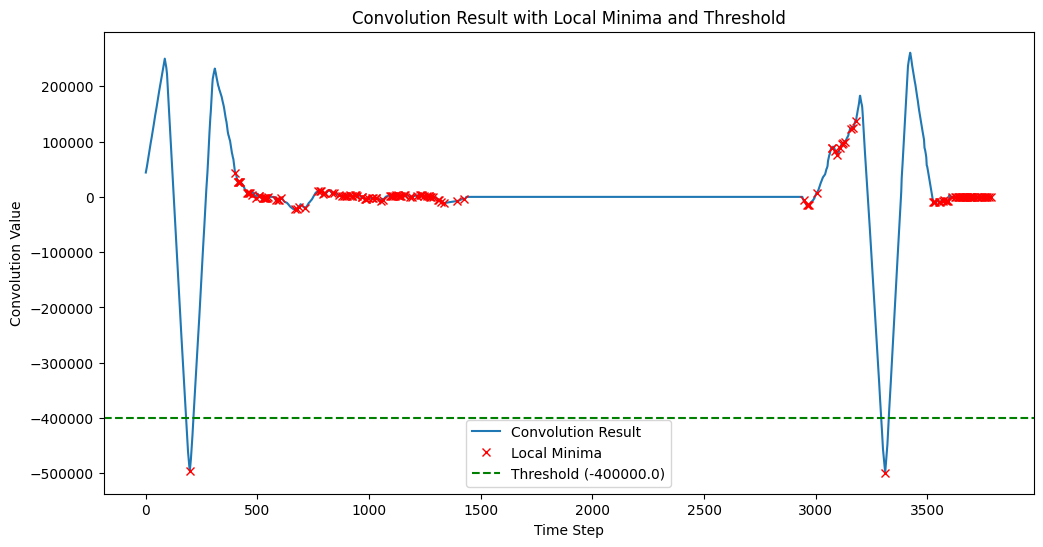

In [10]:
# Example usage:
mocap = MOCAPDataCapture('/Users/danielcopeland/Library/CloudStorage/OneDrive-MassachusettsInstituteofTechnology/Yoga_Study_MOCAP_Data/02/tsv/02_CRW2L_MC_V1.tsv')
actuator_vel_x = mocap.velocity_data['Actuator_vel_X'].to_numpy()
mocap.plot_convolution_result(actuator_vel_x)

In [2]:
# Usage example:
base_file_path = '/Users/danielcopeland/Library/CloudStorage/OneDrive-MassachusettsInstituteofTechnology/Yoga_Study_MOCAP_FP_Data/04/04_MNTRL_MC_V1.tsv'
fp_data_capture = FPDataCapture('/Users/danielcopeland/Library/CloudStorage/OneDrive-MassachusettsInstituteofTechnology/Yoga_Study_MOCAP_FP_Data/04/04_MNTRL_MC_V1.tsv')
fp_data_capture.identify_foot_lift()
# Now you can access the times directly
print(fp_data_capture.foot_lift_times_f_1)
print(fp_data_capture.foot_down_times_f_1)
print(fp_data_capture.foot_lift_times_f_2)
print(fp_data_capture.foot_down_times_f_2)


Data saved to /Users/danielcopeland/Library/Mobile Documents/com~apple~CloudDocs/MIT Masters/DRL/LABx/RADARTreePose/data/csvs/04_MNTRL_MC_V1_f_1.csv
Data saved to /Users/danielcopeland/Library/Mobile Documents/com~apple~CloudDocs/MIT Masters/DRL/LABx/RADARTreePose/data/csvs/04_MNTRL_MC_V1_f_2.csv
[9.97583, 9.97667, 9.9775, 9.97833, 9.97917, 9.98, 9.98083, 9.98167, 9.9825, 9.98333, 9.98417, 9.985, 9.98583, 9.98667, 9.9875, 9.98833, 9.98917, 9.99, 9.99083, 9.99167, 9.9925, 9.99333, 9.99417, 9.995, 9.99583, 9.99667, 9.9975, 9.99833, 9.99917, 10.0, 10.00083, 10.00167, 10.0025, 10.00333, 10.00417, 10.005, 10.00583, 10.00667, 10.0075, 10.00833, 10.00917, 10.01, 10.01083, 10.01167, 10.0125, 10.01333, 10.01417, 10.015, 10.01583, 10.01667, 10.0175, 10.01833, 10.01917, 10.02, 10.02083, 10.02167, 10.0225, 10.02333, 10.02417, 10.025, 10.02583, 10.02667, 10.0275, 10.02833, 10.02917, 10.03, 10.03083, 10.03167, 10.0325, 10.03333, 10.03417, 10.035, 10.03583, 10.03667, 10.0375, 10.03833, 10.03917, 10.0